**Team 1 :**
   * Shobhit Aggarwal (shobhita)
   * Ho Kit Fu (hoikitf)
   * Shiyuan Li (shiyuan2)

In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

predict_file_path = os.getcwd() + '/predictor'
outcome_file_path = 'matrix_for_cluster.csv'

predictor_files = glob.glob(os.path.join(predict_file_path, "*.csv"))
predictor_dfs = []

for file in predictor_files:
    predictor_dfs.append(pd.read_csv(file))
    
outcome_df = pd.read_csv(outcome_file_path)
outcome_df = outcome_df.rename(columns={'patient': 'Patient ID'})

for i in range(len(predictor_dfs)):
    if 'IdPaciente' in predictor_dfs[i].columns:
        predictor_dfs[i] = predictor_dfs[i].rename(columns={'IdPaciente': 'Patient ID'})
    if 'Patient Id' in predictor_dfs[i].columns:
        predictor_dfs[i] = predictor_dfs[i].rename(columns={'Patient Id': 'Patient ID'})
    if 'Fecha' in predictor_dfs[i].columns:
        predictor_dfs[i] = predictor_dfs[i].rename(columns={'Fecha': 'Date'})
    if 'Date hour' in predictor_dfs[i].columns:
        predictor_dfs[i] = predictor_dfs[i].rename(columns={'Date hour': 'Date'})
    if 'Unnamed: 0' in predictor_dfs[i].columns:
        predictor_dfs[i] = predictor_dfs[i].drop(columns = ['Unnamed: 0'])
    if 'psicologiasesion1' in predictor_dfs[i].columns:
        predictor_dfs[i] = predictor_dfs[i].drop(columns = ['psicologiasesion1'])
    if 'IdRetinografia' in predictor_dfs[i].columns:
        predictor_dfs[i] = predictor_dfs[i].drop(columns = ['IdRetinografia'])
    if 'IdDietPatient' in predictor_dfs[i].columns:
        predictor_dfs[i] = predictor_dfs[i].drop(columns = ['IdDietPatient'])
    if 'Branch id' in predictor_dfs[i].columns:
        predictor_dfs[i] = predictor_dfs[i].drop(columns = ['Branch id'])
    if 'Hora' in predictor_dfs[i].columns:
        predictor_dfs[i] = predictor_dfs[i].drop(columns = ['Hora'])
        

predictor_dfs[3] = predictor_dfs[3][['Patient ID', 'TrastornosConductaAlimetaria', 
                                     'ApoyoSocialEmocional', 'ApoyoInstrumental']]
predictor_dfs[4] = predictor_dfs[4][['Patient ID', 'Neuropathy', 'PERIFERICA', 'VISCERAL', 'AUTONOMICA']]
predictor_dfs[5] = predictor_dfs[5][['Patient ID', 'TrastornosConductaAlimetaria', 
                                     'ApoyoSocialEmocional', 'ApoyoInstrumental']]
predictor_dfs[6] = predictor_dfs[6].drop_duplicates(subset=['Patient ID'])
predictor_dfs[6] = predictor_dfs[6][['Patient ID', 'Calories', 'ReqEnergeticoBasal', 'BMI']]

merged_predictor_df = pd.merge(predictor_dfs[0], predictor_dfs[1], on = "Patient ID", how = "left")
for i in range(2, 7):
    merged_predictor_df = pd.merge(merged_predictor_df, predictor_dfs[i], on = "Patient ID", how = "left")

merged_predictor_df = merged_predictor_df._get_numeric_data()
merged_predictor_df = merged_predictor_df.fillna(merged_predictor_df.mean(numeric_only = True, axis = 0))

predictor_month = outcome_df.columns[1:-1]
outcome_month = outcome_df.columns[2:]

### Random forest

#### Try to see how month engagement data influence the result. Predict the last month with 1 previous month data to 10 previous months data. 

The prediction accuracy of the highest engagement for 2016-12-01 with 1 month(s) data is 0.8151893714059092. 



<Figure size 432x288 with 0 Axes>

The prediction accuracy of the highest engagement for 2016-12-01 with 2 month(s) data is 0.8185603807257584. 



<Figure size 432x288 with 0 Axes>

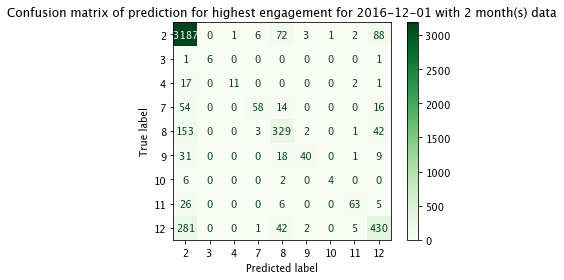

The prediction accuracy of the highest engagement for 2016-12-01 with 3 month(s) data is 0.8229228633749752. 



<Figure size 432x288 with 0 Axes>

The prediction accuracy of the highest engagement for 2016-12-01 with 4 month(s) data is 0.825302399365457. 



<Figure size 432x288 with 0 Axes>

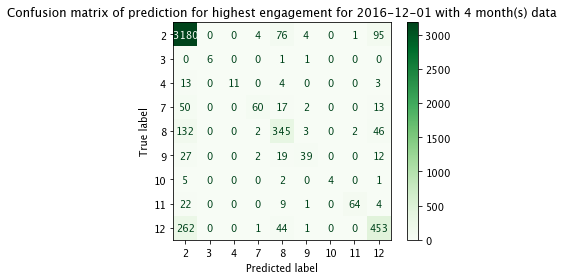

The prediction accuracy of the highest engagement for 2016-12-01 with 5 month(s) data is 0.828078524687686. 



<Figure size 432x288 with 0 Axes>

The prediction accuracy of the highest engagement for 2016-12-01 with 6 month(s) data is 0.8274836406900654. 



<Figure size 432x288 with 0 Axes>

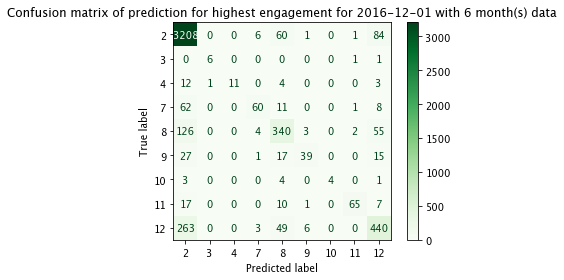

The prediction accuracy of the highest engagement for 2016-12-01 with 7 month(s) data is 0.8334324806662701. 



<Figure size 432x288 with 0 Axes>

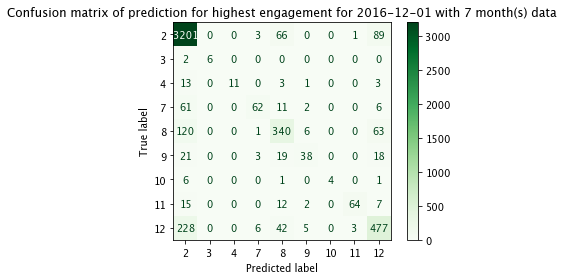

The prediction accuracy of the highest engagement for 2016-12-01 with 8 month(s) data is 0.825302399365457. 



<Figure size 432x288 with 0 Axes>

The prediction accuracy of the highest engagement for 2016-12-01 with 9 month(s) data is 0.8304580606781677. 



<Figure size 432x288 with 0 Axes>

The prediction accuracy of the highest engagement for 2016-12-01 with 10 month(s) data is 0.8372000793178663. 



<Figure size 432x288 with 0 Axes>

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

total_df = pd.merge(merged_predictor_df, outcome_df, on = "Patient ID", how = "inner")
total_y = total_df[['2016-12-01']]
cols = list(outcome_df.columns[1:-1])
cols.reverse()
for i in range(1, 11):
    list_ = cols[0:i]
    list_.append("Patient ID")
    month_data = outcome_df[list_]
    total_x = pd.merge(merged_predictor_df, month_data, on = "Patient ID", how = "inner")
    total_x = total_x.drop(columns = ['Patient ID'])
    
    X_train, X_test, y_train, y_test = train_test_split(total_x, total_y, test_size=0.33, random_state=42)
    clf = RandomForestClassifier(n_estimators = 10, 
                                 random_state = 0)
    
    clf.fit(X_train, np.array(y_train).reshape(1,-1)[0])
    pred_test_rf = clf.predict(X_test)
    
    test_acc = sum(np.multiply(pred_test_rf == np.array(y_test).reshape(1,-1)[0], 1)) / y_test.shape[0]
    print('The prediction accuracy of the highest engagement for {} with {} month(s) data is {}. \n'.format('2016-12-01', i, test_acc))
    
    cm = confusion_matrix(np.array(y_test).reshape(1,-1)[0], pred_test_rf)
    plt.figure()
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = np.sort(y_test['2016-12-01'].unique()))
    disp.plot(cmap = plt.cm.Greens)
    plt.title('Confusion matrix of prediction for highest engagement for {} with {} month(s) data'.format('2016-12-01', i))
    plt.show()

The prediction report for highest engagement for 2013-07-01
              precision    recall  f1-score   support

           2   0.985044  0.998754  0.991851      4814
           8   0.955414  0.688073  0.800000       218
          10   1.000000  0.454545  0.625000        11

    accuracy                       0.984136      5043
   macro avg   0.980153  0.713791  0.805617      5043
weighted avg   0.983796  0.984136  0.982758      5043

The overall prediction accuracy of the highest engagement for 2013-07-01 is 0.9841364267301209. 



<Figure size 432x288 with 0 Axes>

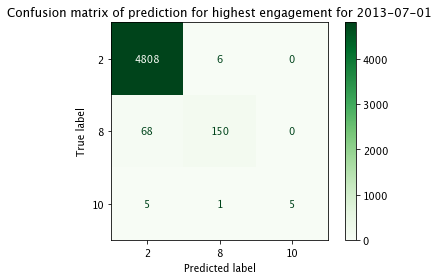

The prediction report for highest engagement for 2013-08-01
              precision    recall  f1-score   support

           2   0.989551  0.997728  0.993623      4841
           8   0.905063  0.760638  0.826590       188
          10   1.000000  0.285714  0.444444        14

    accuracy                       0.986913      5043
   macro avg   0.964872  0.681360  0.754886      5043
weighted avg   0.986431  0.986913  0.985871      5043

The overall prediction accuracy of the highest engagement for 2013-08-01 is 0.9869125520523498. 



<Figure size 432x288 with 0 Axes>

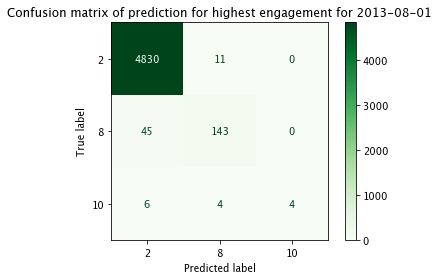

The prediction report for highest engagement for 2013-09-01
              precision    recall  f1-score   support

           2   0.987900  0.996896  0.992377      4832
           8   0.905660  0.720000  0.802228       200
          10   1.000000  0.727273  0.842105        11

    accuracy                       0.985326      5043
   macro avg   0.964520  0.814723  0.878904      5043
weighted avg   0.984665  0.985326  0.984509      5043

The overall prediction accuracy of the highest engagement for 2013-09-01 is 0.9853261947253619. 



<Figure size 432x288 with 0 Axes>

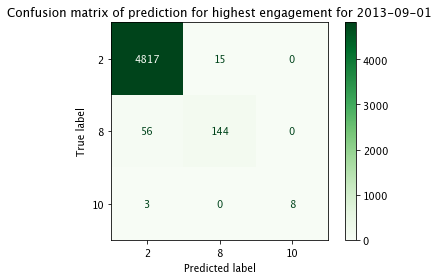

The prediction report for highest engagement for 2013-10-01
              precision    recall  f1-score   support

           2   0.986276  0.998755  0.992477      4821
           8   0.961538  0.700935  0.810811       214
          10   1.000000  0.625000  0.769231         8

    accuracy                       0.985524      5043
   macro avg   0.982605  0.774897  0.857506      5043
weighted avg   0.985248  0.985524  0.984413      5043

The overall prediction accuracy of the highest engagement for 2013-10-01 is 0.9855244893912354. 



<Figure size 432x288 with 0 Axes>

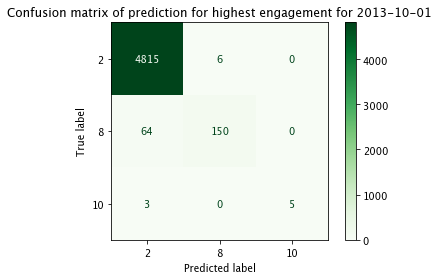

The prediction report for highest engagement for 2013-11-01
              precision    recall  f1-score   support

           2   0.992740  0.999797  0.996256      4924
           8   0.987805  0.723214  0.835052       112
          10   1.000000  0.285714  0.444444         7

    accuracy                       0.992663      5043
   macro avg   0.993515  0.669575  0.758584      5043
weighted avg   0.992641  0.992663  0.991910      5043

The overall prediction accuracy of the highest engagement for 2013-11-01 is 0.992663097362681. 



<Figure size 432x288 with 0 Axes>

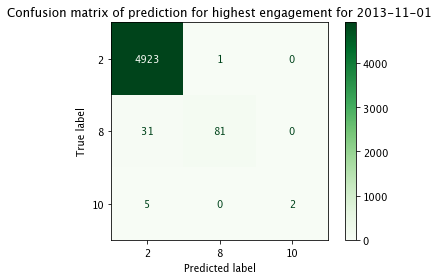

The prediction report for highest engagement for 2013-12-01
              precision    recall  f1-score   support

           2   0.987211  1.000000  0.993564      4863
           8   1.000000  0.672619  0.804270       168
          10   1.000000  0.333333  0.500000        12

    accuracy                       0.987507      5043
   macro avg   0.995737  0.668651  0.765945      5043
weighted avg   0.987667  0.987507  0.986084      5043

The overall prediction accuracy of the highest engagement for 2013-12-01 is 0.9875074360499703. 



<Figure size 432x288 with 0 Axes>

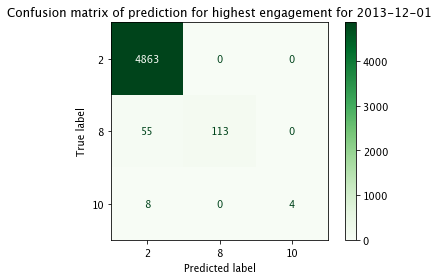

The prediction report for highest engagement for 2014-01-01
              precision    recall  f1-score   support

           2   0.982812  0.998107  0.990401      4755
           8   0.956522  0.717391  0.819876       276
          10   1.000000  0.583333  0.736842        12

    accuracy                       0.981757      5043
   macro avg   0.979778  0.766277  0.849040      5043
weighted avg   0.981414  0.981757  0.980465      5043

The overall prediction accuracy of the highest engagement for 2014-01-01 is 0.9817568907396391. 



<Figure size 432x288 with 0 Axes>

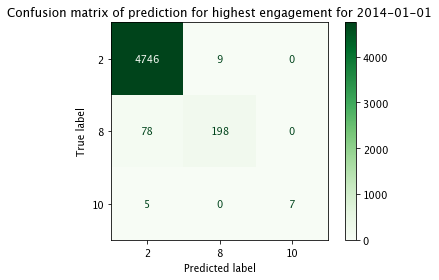

The prediction report for highest engagement for 2014-02-01
              precision    recall  f1-score   support

           2   0.982984  0.994541  0.988729      4763
           8   0.876777  0.719844  0.790598       257
          10   1.000000  0.565217  0.722222        23

    accuracy                       0.978584      5043
   macro avg   0.953254  0.759868  0.833850      5043
weighted avg   0.977649  0.978584  0.977416      5043

The overall prediction accuracy of the highest engagement for 2014-02-01 is 0.9785841760856633. 



<Figure size 432x288 with 0 Axes>

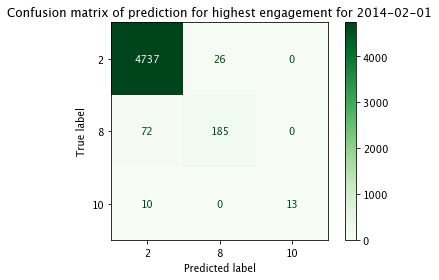

The prediction report for highest engagement for 2014-03-01
              precision    recall  f1-score   support

           2   0.980613  0.996188  0.988339      4722
           8   0.917749  0.697368  0.792523       304
          10   1.000000  0.882353  0.937500        17

    accuracy                       0.977791      5043
   macro avg   0.966121  0.858636  0.906121      5043
weighted avg   0.976889  0.977791  0.976364      5043

The overall prediction accuracy of the highest engagement for 2014-03-01 is 0.9777909974221694. 



<Figure size 432x288 with 0 Axes>

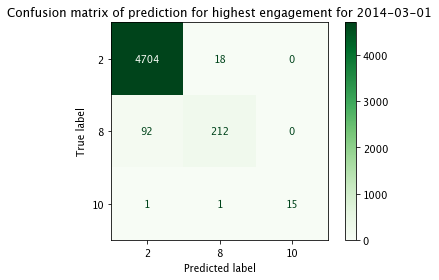

The prediction report for highest engagement for 2014-04-01
              precision    recall  f1-score   support

           2   0.982380  0.997474  0.989869      4751
           8   0.940299  0.713208  0.811159       265
          10   1.000000  0.666667  0.800000        27

    accuracy                       0.980765      5043
   macro avg   0.974226  0.792449  0.867009      5043
weighted avg   0.980263  0.980765  0.979462      5043

The overall prediction accuracy of the highest engagement for 2014-04-01 is 0.9807654174102717. 



<Figure size 432x288 with 0 Axes>

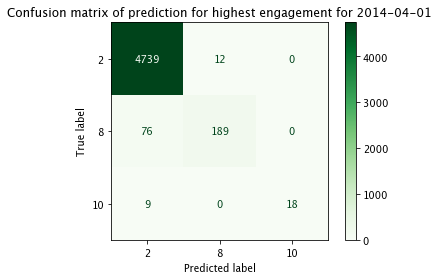

The prediction report for highest engagement for 2014-05-01
              precision    recall  f1-score   support

           2   0.977792  0.995520  0.986576      4688
           8   0.915663  0.690909  0.787565       330
          10   1.000000  0.840000  0.913043        25

    accuracy                       0.974817      5043
   macro avg   0.964485  0.842143  0.895728      5043
weighted avg   0.973836  0.974817  0.973189      5043

The overall prediction accuracy of the highest engagement for 2014-05-01 is 0.974816577434067. 



<Figure size 432x288 with 0 Axes>

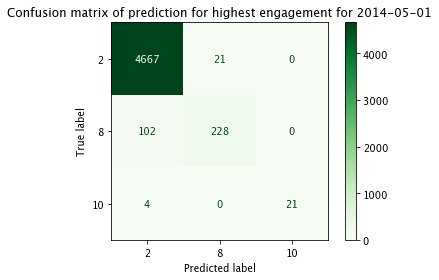

The prediction report for highest engagement for 2014-06-01
              precision    recall  f1-score   support

           2   0.981768  0.994631  0.988157      4656
           8   0.908517  0.786885  0.843338       366
          10   0.888889  0.380952  0.533333        21

    accuracy                       0.976998      5043
   macro avg   0.926391  0.720823  0.788276      5043
weighted avg   0.976065  0.976998  0.975753      5043

The overall prediction accuracy of the highest engagement for 2014-06-01 is 0.9769978187586754. 



<Figure size 432x288 with 0 Axes>

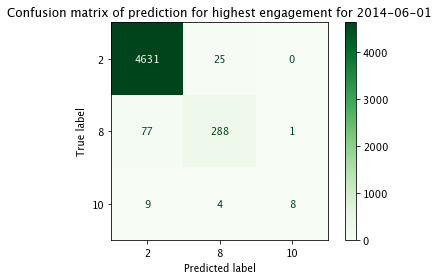

The prediction report for highest engagement for 2014-07-01
              precision    recall  f1-score   support

           2   0.975048  0.994393  0.984625      4637
           8   0.906475  0.700000  0.789969       360
          10   1.000000  0.777778  0.875000        36
          12   1.000000  0.800000  0.888889        10

    accuracy                       0.971446      5043
   macro avg   0.970381  0.818043  0.884621      5043
weighted avg   0.970380  0.971446  0.969757      5043

The overall prediction accuracy of the highest engagement for 2014-07-01 is 0.9714455681142177. 



<Figure size 432x288 with 0 Axes>

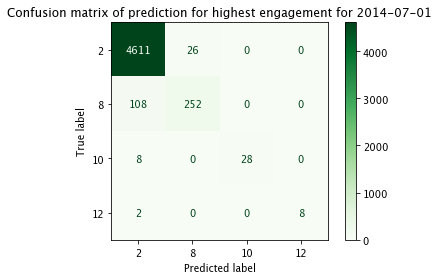

The prediction report for highest engagement for 2014-08-01
              precision    recall  f1-score   support

           2   0.974490  0.994360  0.984325      4610
           7   1.000000  0.750000  0.857143         4
           8   0.906452  0.745358  0.818049       377
           9   1.000000  1.000000  1.000000         1
          10   1.000000  0.541667  0.702703        24
          11   0.000000  0.000000  0.000000         2
          12   1.000000  0.480000  0.648649        25

    accuracy                       0.970454      5043
   macro avg   0.840134  0.644484  0.715838      5043
weighted avg   0.969290  0.970454  0.968402      5043

The overall prediction accuracy of the highest engagement for 2014-08-01 is 0.9704540947848503. 



<Figure size 432x288 with 0 Axes>

The prediction report for highest engagement for 2014-09-01
              precision    recall  f1-score   support

           2   0.971925  0.995172  0.983411      4557
           7   1.000000  0.500000  0.666667         2
           8   0.917647  0.742857  0.821053       420
           9   0.000000  0.000000  0.000000         1
          10   1.000000  0.705882  0.827586        17
          12   1.000000  0.521739  0.685714        46

    accuracy                       0.968471      5043
   macro avg   0.814929  0.577608  0.664072      5043
weighted avg   0.967573  0.968471  0.966328      5043

The overall prediction accuracy of the highest engagement for 2014-09-01 is 0.9684711481261155. 



<Figure size 432x288 with 0 Axes>

The prediction report for highest engagement for 2014-10-01
              precision    recall  f1-score   support

           2   0.962609  0.993422  0.977773      4561
           7   0.000000  0.000000  0.000000         4
           8   0.855124  0.641910  0.733333       377
           9   1.000000  0.600000  0.750000         5
          10   1.000000  0.625000  0.769231        24
          11   1.000000  0.444444  0.615385         9
          12   0.838710  0.412698  0.553191        63

    accuracy                       0.955979      5043
   macro avg   0.808063  0.531068  0.628416      5043
weighted avg   0.952544  0.955979  0.951555      5043

The overall prediction accuracy of the highest engagement for 2014-10-01 is 0.9559785841760856. 



<Figure size 432x288 with 0 Axes>

The prediction report for highest engagement for 2014-11-01
              precision    recall  f1-score   support

           2   0.959770  0.993610  0.976397      4538
           7   0.000000  0.000000  0.000000         1
           8   0.861210  0.657609  0.745763       368
           9   1.000000  1.000000  1.000000         4
          10   1.000000  0.387097  0.558140        31
          11   1.000000  0.600000  0.750000         5
          12   0.933333  0.437500  0.595745        96

    accuracy                       0.954194      5043
   macro avg   0.822045  0.582259  0.660863      5043
weighted avg   0.952203  0.954194  0.949350      5043

The overall prediction accuracy of the highest engagement for 2014-11-01 is 0.9541939321832242. 



<Figure size 432x288 with 0 Axes>

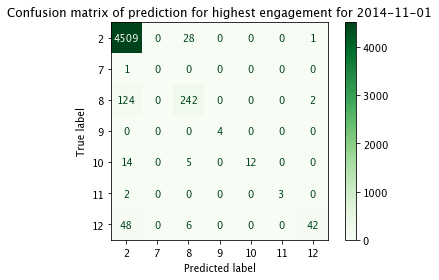

The prediction report for highest engagement for 2014-12-01
              precision    recall  f1-score   support

           2   0.950901  0.993504  0.971735      4464
           7   1.000000  0.545455  0.705882        22
           8   0.813953  0.686275  0.744681       255
           9   0.814815  0.611111  0.698413        36
          10   1.000000  0.360000  0.529412        25
          11   1.000000  0.636364  0.777778        22
          12   0.823529  0.383562  0.523364       219

    accuracy                       0.942098      5043
   macro avg   0.914743  0.602324  0.707324      5043
weighted avg   0.938145  0.942098  0.934633      5043

The overall prediction accuracy of the highest engagement for 2014-12-01 is 0.9420979575649415. 



<Figure size 432x288 with 0 Axes>

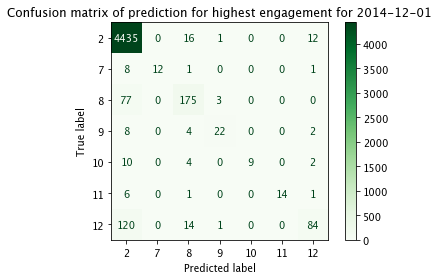

The prediction report for highest engagement for 2015-01-01
              precision    recall  f1-score   support

           2   0.952298  0.994314  0.972853      4397
           7   1.000000  0.590909  0.742857        22
           8   0.851562  0.598901  0.703226       182
           9   1.000000  0.785714  0.880000        56
          10   0.750000  0.272727  0.400000        11
          11   0.981481  0.688312  0.809160        77
          12   0.789474  0.553691  0.650888       298

    accuracy                       0.943684      5043
   macro avg   0.903545  0.640653  0.736998      5043
weighted avg   0.939783  0.943684  0.938313      5043

The overall prediction accuracy of the highest engagement for 2015-01-01 is 0.9436843148919294. 



<Figure size 432x288 with 0 Axes>

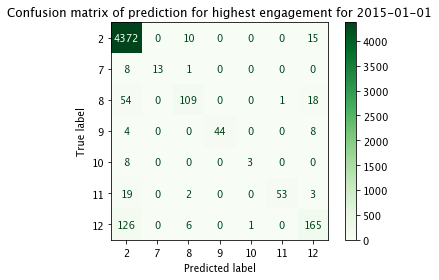

The prediction report for highest engagement for 2015-02-01
              precision    recall  f1-score   support

           2   0.942845  0.991512  0.966566      4359
           7   0.904762  0.760000  0.826087        25
           8   0.763314  0.586364  0.663239       220
           9   0.894737  0.750000  0.816000        68
          10   0.944444  0.680000  0.790698        25
          11   0.956522  0.458333  0.619718        48
          12   0.830409  0.476510  0.605544       298

    accuracy                       0.932382      5043
   macro avg   0.891005  0.671817  0.755407      5043
weighted avg   0.927669  0.932382  0.925100      5043

The overall prediction accuracy of the highest engagement for 2015-02-01 is 0.9323815189371406. 



<Figure size 432x288 with 0 Axes>

The prediction report for highest engagement for 2015-03-01
              precision    recall  f1-score   support

           2   0.945615  0.988160  0.966420      4223
           7   1.000000  0.666667  0.800000        30
           8   0.800000  0.717557  0.756539       262
           9   0.870370  0.626667  0.728682        75
          10   0.812500  0.520000  0.634146        25
          11   0.950000  0.760000  0.844444        50
          12   0.796226  0.558201  0.656299       378

    accuracy                       0.930002      5043
   macro avg   0.882102  0.691036  0.769504      5043
weighted avg   0.925441  0.930002  0.924888      5043

The overall prediction accuracy of the highest engagement for 2015-03-01 is 0.9300019829466587. 



<Figure size 432x288 with 0 Axes>

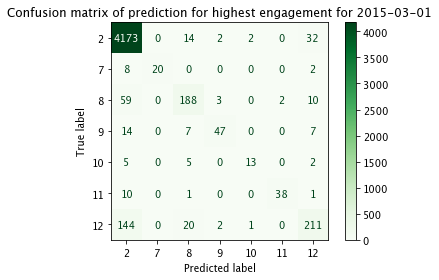

The prediction report for highest engagement for 2015-04-01
              precision    recall  f1-score   support

           2   0.942186  0.986522  0.963844      4229
           7   1.000000  0.722222  0.838710        36
           8   0.801688  0.633333  0.707635       300
           9   0.916667  0.647059  0.758621        51
          10   1.000000  0.600000  0.750000        30
          11   0.904762  0.775510  0.835165        49
          12   0.777344  0.571839  0.658940       348

    accuracy                       0.927226      5043
   macro avg   0.906092  0.705212  0.787559      5043
weighted avg   0.922588  0.927226  0.922071      5043

The overall prediction accuracy of the highest engagement for 2015-04-01 is 0.9272258576244299. 



<Figure size 432x288 with 0 Axes>

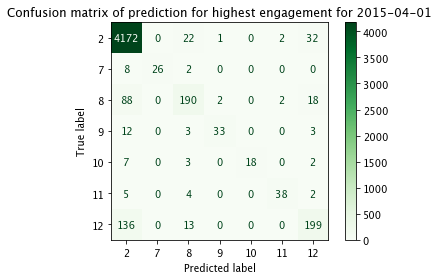

The prediction report for highest engagement for 2015-05-01
              precision    recall  f1-score   support

           2   0.939834  0.984783  0.961783      4140
           7   1.000000  0.360000  0.529412        25
           8   0.760181  0.595745  0.667992       282
           9   0.821429  0.707692  0.760331        65
          10   0.904762  0.513514  0.655172        37
          11   1.000000  0.551020  0.710526        49
          12   0.757412  0.631461  0.688725       445

    accuracy                       0.917509      5043
   macro avg   0.883374  0.620602  0.710563      5043
weighted avg   0.912790  0.917509  0.911829      5043

The overall prediction accuracy of the highest engagement for 2015-05-01 is 0.917509418996629. 



<Figure size 432x288 with 0 Axes>

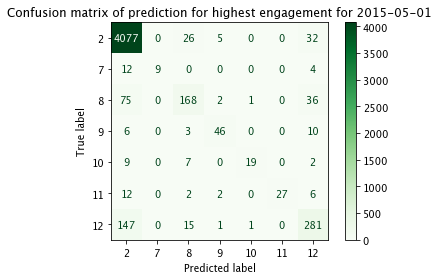

The prediction report for highest engagement for 2015-06-01
              precision    recall  f1-score   support

           2   0.931729  0.986281  0.958229      4082
           7   1.000000  0.320000  0.484848        25
           8   0.756522  0.587838  0.661597       296
           9   0.881356  0.684211  0.770370        76
          10   1.000000  0.555556  0.714286        27
          11   0.980769  0.637500  0.772727        80
          12   0.768156  0.601751  0.674847       457

    accuracy                       0.912354      5043
   macro avg   0.902647  0.624734  0.719558      5043
weighted avg   0.907345  0.912354  0.905711      5043

The overall prediction accuracy of the highest engagement for 2015-06-01 is 0.9123537576839184. 



<Figure size 432x288 with 0 Axes>

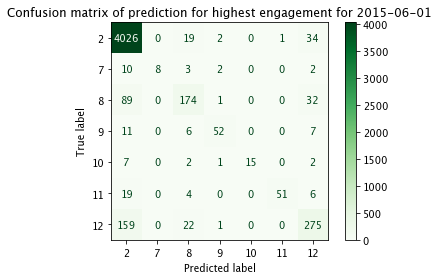

The prediction report for highest engagement for 2015-07-01
              precision    recall  f1-score   support

           2   0.930854  0.981891  0.955692      3976
           7   1.000000  0.333333  0.500000        30
           8   0.809187  0.643258  0.716745       356
           9   0.897436  0.673077  0.769231        52
          10   1.000000  0.410256  0.581818        39
          11   1.000000  0.591837  0.743590        49
          12   0.811441  0.707948  0.756170       541

    accuracy                       0.913345      5043
   macro avg   0.921274  0.620229  0.717606      5043
weighted avg   0.910728  0.913345  0.907834      5043

The overall prediction accuracy of the highest engagement for 2015-07-01 is 0.9133452310132858. 



<Figure size 432x288 with 0 Axes>

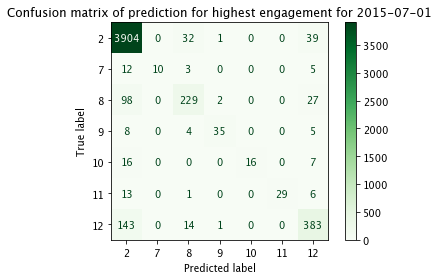

The prediction report for highest engagement for 2015-08-01
              precision    recall  f1-score   support

           2   0.932329  0.985093  0.957985      3958
           7   0.904762  0.513514  0.655172        37
           8   0.817590  0.655352  0.727536       383
           9   0.935484  0.725000  0.816901        80
          10   0.850000  0.472222  0.607143        36
          11   1.000000  0.657534  0.793388        73
          12   0.813896  0.689076  0.746303       476

    accuracy                       0.916121      5043
   macro avg   0.893437  0.671113  0.757776      5043
weighted avg   0.912676  0.916121  0.911156      5043

The overall prediction accuracy of the highest engagement for 2015-08-01 is 0.9161213563355146. 



<Figure size 432x288 with 0 Axes>

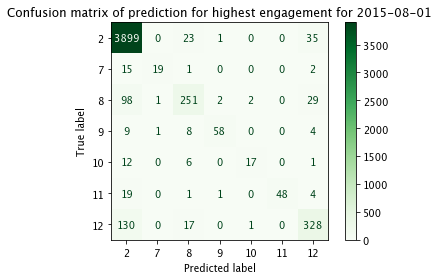

The prediction report for highest engagement for 2015-09-01
              precision    recall  f1-score   support

           2   0.927491  0.979959  0.953004      3942
           4   0.875000  1.000000  0.933333         7
           7   0.833333  0.428571  0.566038        35
           8   0.784848  0.701897  0.741059       369
           9   1.000000  0.688525  0.815534        61
          10   0.875000  0.368421  0.518519        38
          11   1.000000  0.672414  0.804124        58
          12   0.771765  0.615385  0.684760       533

    accuracy                       0.905612      5043
   macro avg   0.883430  0.681896  0.752046      5043
weighted avg   0.901184  0.905612  0.899782      5043

The overall prediction accuracy of the highest engagement for 2015-09-01 is 0.9056117390442198. 



<Figure size 432x288 with 0 Axes>

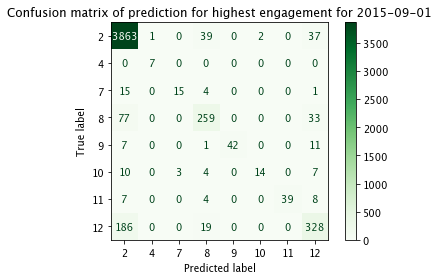

The prediction report for highest engagement for 2015-10-01
              precision    recall  f1-score   support

           2   0.908213  0.981211  0.943302      3832
           4   1.000000  0.263158  0.416667        19
           7   1.000000  0.462963  0.632911        54
           8   0.785276  0.651399  0.712100       393
           9   1.000000  0.610169  0.757895        59
          10   0.869565  0.465116  0.606061        43
          11   0.914894  0.632353  0.747826        68
          12   0.775510  0.594783  0.673228       575

    accuracy                       0.889748      5043
   macro avg   0.906682  0.582644  0.686249      5043
weighted avg   0.885665  0.889748  0.881502      5043

The overall prediction accuracy of the highest engagement for 2015-10-01 is 0.8897481657743407. 



<Figure size 432x288 with 0 Axes>

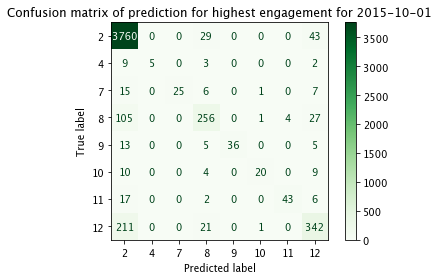

The prediction report for highest engagement for 2015-11-01
              precision    recall  f1-score   support

           2   0.909025  0.981355  0.943806      3808
           4   0.875000  0.333333  0.482759        21
           7   1.000000  0.500000  0.666667        40
           8   0.826797  0.660574  0.734398       383
           9   0.945946  0.555556  0.700000        63
          10   1.000000  0.222222  0.363636        18
          11   1.000000  0.568966  0.725275        58
          12   0.763359  0.613497  0.680272       652

    accuracy                       0.890145      5043
   macro avg   0.915016  0.554438  0.662102      5043
weighted avg   0.886359  0.890145  0.882082      5043

The overall prediction accuracy of the highest engagement for 2015-11-01 is 0.8901447551060876. 



<Figure size 432x288 with 0 Axes>

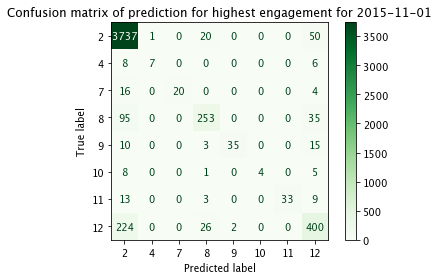

The prediction report for highest engagement for 2015-12-01
              precision    recall  f1-score   support

           2   0.910710  0.982627  0.945303      3799
           4   1.000000  0.428571  0.600000        21
           7   1.000000  0.388889  0.560000        54
           8   0.739938  0.678977  0.708148       352
           9   0.975610  0.555556  0.707965        72
          10   1.000000  0.263158  0.416667        19
          11   0.953846  0.756098  0.843537        82
          12   0.810417  0.604037  0.692171       644

    accuracy                       0.891929      5043
   macro avg   0.923815  0.582239  0.684224      5043
weighted avg   0.889275  0.891929  0.883825      5043

The overall prediction accuracy of the highest engagement for 2015-12-01 is 0.8919294070989491. 



<Figure size 432x288 with 0 Axes>

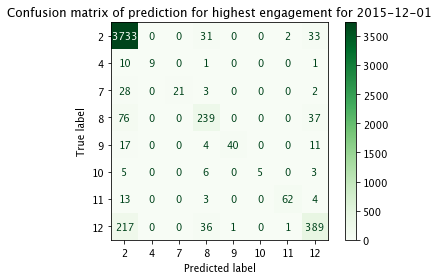

The prediction report for highest engagement for 2016-01-01
              precision    recall  f1-score   support

           2   0.908361  0.974939  0.940473      3711
           4   1.000000  0.400000  0.571429        20
           6   1.000000  1.000000  1.000000         1
           7   0.851852  0.418182  0.560976        55
           8   0.769042  0.670236  0.716247       467
           9   0.910714  0.542553  0.680000        94
          10   0.933333  0.736842  0.823529        19
          11   0.880952  0.500000  0.637931        74
          12   0.755952  0.632890  0.688969       602

    accuracy                       0.881618      5043
   macro avg   0.890023  0.652849  0.735506      5043
weighted avg   0.876767  0.881618  0.874360      5043

The overall prediction accuracy of the highest engagement for 2016-01-01 is 0.8816180844735276. 



<Figure size 432x288 with 0 Axes>

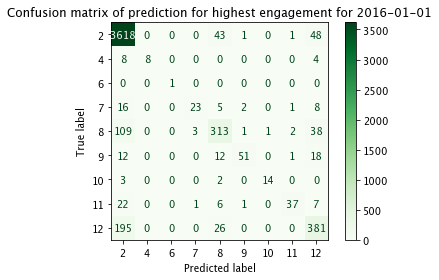

The prediction report for highest engagement for 2016-02-01
              precision    recall  f1-score   support

           2   0.894509  0.980769  0.935655      3588
           3   0.000000  0.000000  0.000000         1
           4   1.000000  0.272727  0.428571        11
           7   0.952381  0.533333  0.683761        75
           8   0.764706  0.633475  0.692932       472
           9   0.864865  0.659794  0.748538        97
          10   1.000000  0.181818  0.307692        11
          11   0.914894  0.511905  0.656489        84
          12   0.774545  0.605114  0.679426       704

    accuracy                       0.871703      5043
   macro avg   0.796211  0.486548  0.570340      5043
weighted avg   0.866526  0.871703  0.862511      5043

The overall prediction accuracy of the highest engagement for 2016-02-01 is 0.8717033511798533. 



<Figure size 432x288 with 0 Axes>

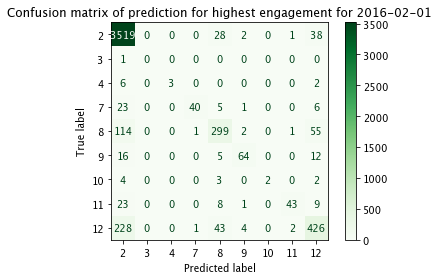

The prediction report for highest engagement for 2016-03-01
              precision    recall  f1-score   support

           2   0.901724  0.976595  0.937667      3589
           3   1.000000  0.500000  0.666667         2
           4   1.000000  0.609756  0.757576        41
           6   1.000000  0.500000  0.666667         2
           7   0.785714  0.309859  0.444444        71
           8   0.729017  0.663755  0.694857       458
           9   0.890625  0.548077  0.678571       104
          10   1.000000  0.750000  0.857143        16
          11   0.978723  0.657143  0.786325        70
          12   0.786096  0.639130  0.705036       690

    accuracy                       0.875273      5043
   macro avg   0.907190  0.615432  0.719495      5043
weighted avg   0.870613  0.875273  0.867463      5043

The overall prediction accuracy of the highest engagement for 2016-03-01 is 0.8752726551655761. 



<Figure size 432x288 with 0 Axes>

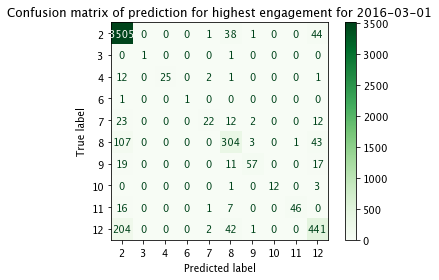

The prediction report for highest engagement for 2016-04-01
              precision    recall  f1-score   support

           2   0.873806  0.974669  0.921486      3474
           4   1.000000  0.764706  0.866667        17
           6   0.000000  0.000000  0.000000         2
           7   0.896552  0.361111  0.514851        72
           8   0.765873  0.677193  0.718808       570
           9   0.918919  0.680000  0.781609       100
          10   1.000000  0.350000  0.518519        20
          11   0.975000  0.481481  0.644628        81
          12   0.778443  0.551627  0.645695       707

    accuracy                       0.855641      5043
   macro avg   0.800955  0.537865  0.623585      5043
weighted avg   0.851662  0.855641  0.844739      5043

The overall prediction accuracy of the highest engagement for 2016-04-01 is 0.8556414832441007. 



<Figure size 432x288 with 0 Axes>

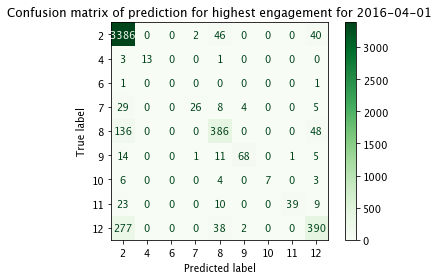

The prediction report for highest engagement for 2016-05-01
              precision    recall  f1-score   support

           2   0.867659  0.971148  0.916491      3362
           3   0.000000  0.000000  0.000000         2
           4   1.000000  0.368421  0.538462        19
           6   1.000000  0.250000  0.400000         4
           7   0.916667  0.434211  0.589286        76
           8   0.733686  0.663477  0.696817       627
           9   0.947368  0.562500  0.705882        64
          10   0.928571  0.481481  0.634146        27
          11   0.959184  0.494737  0.652778        95
          12   0.797535  0.590613  0.678652       767

    accuracy                       0.846917      5043
   macro avg   0.815067  0.481659  0.581251      5043
weighted avg   0.844397  0.846917  0.836725      5043

The overall prediction accuracy of the highest engagement for 2016-05-01 is 0.8469165179456672. 



<Figure size 432x288 with 0 Axes>

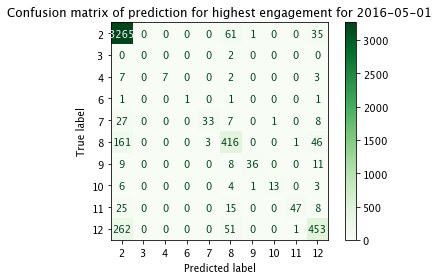

The prediction report for highest engagement for 2016-06-01
              precision    recall  f1-score   support

           2   0.852183  0.967453  0.906167      3349
           3   0.000000  0.000000  0.000000         1
           4   1.000000  0.500000  0.666667        16
           6   0.000000  0.000000  0.000000         1
           7   0.806452  0.342466  0.480769        73
           8   0.778151  0.671988  0.721184       689
           9   0.921875  0.608247  0.732919        97
          10   0.900000  0.473684  0.620690        19
          11   0.983051  0.682353  0.805556        85
          12   0.774262  0.514727  0.618366       713

    accuracy                       0.838588      5043
   macro avg   0.701597  0.476092  0.555232      5043
weighted avg   0.834247  0.838588  0.826822      5043

The overall prediction accuracy of the highest engagement for 2016-06-01 is 0.8385881419789808. 



<Figure size 432x288 with 0 Axes>

The prediction report for highest engagement for 2016-07-01
              precision    recall  f1-score   support

           2   0.845185  0.968431  0.902620      3326
           4   1.000000  0.235294  0.380952        17
           6   1.000000  1.000000  1.000000         4
           7   0.812500  0.419355  0.553191        93
           8   0.721154  0.629195  0.672043       596
           9   0.864198  0.546875  0.669856       128
          10   1.000000  0.619048  0.764706        21
          11   0.923077  0.510638  0.657534        94
          12   0.768627  0.513089  0.615385       764

    accuracy                       0.826096      5043
   macro avg   0.881638  0.604658  0.690699      5043
weighted avg   0.821549  0.826096  0.812679      5043

The overall prediction accuracy of the highest engagement for 2016-07-01 is 0.8260955780289511. 



<Figure size 432x288 with 0 Axes>

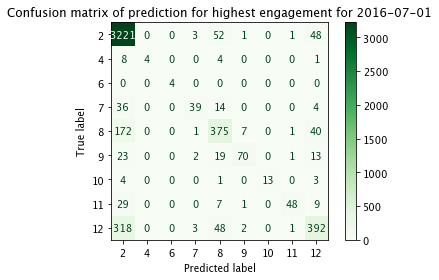

The prediction report for highest engagement for 2016-08-01
              precision    recall  f1-score   support

           2   0.842530  0.958066  0.896591      3267
           4   0.888889  0.216216  0.347826        37
           6   1.000000  0.500000  0.666667         2
           7   0.955556  0.394495  0.558442       109
           8   0.723333  0.662595  0.691633       655
           9   0.907692  0.495798  0.641304       119
          10   1.000000  0.526316  0.689655        19
          11   0.926471  0.577982  0.711864       109
          12   0.743396  0.542700  0.627389       726

    accuracy                       0.821337      5043
   macro avg   0.887541  0.541574  0.647930      5043
weighted avg   0.819568  0.821337  0.808993      5043

The overall prediction accuracy of the highest engagement for 2016-08-01 is 0.8213365060479874. 



<Figure size 432x288 with 0 Axes>

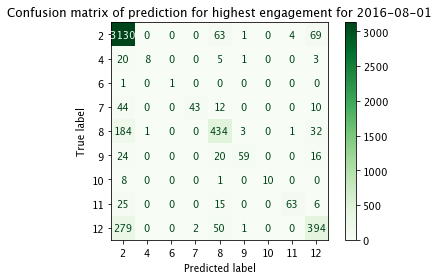

The prediction report for highest engagement for 2016-09-01
              precision    recall  f1-score   support

           2   0.835347  0.968046  0.896814      3286
           3   1.000000  1.000000  1.000000         1
           4   1.000000  0.240000  0.387097        25
           6   0.000000  0.000000  0.000000         1
           7   0.921569  0.451923  0.606452       104
           8   0.719424  0.627943  0.670578       637
           9   0.898551  0.476923  0.623116       130
          10   1.000000  0.437500  0.608696        16
          11   0.931507  0.607143  0.735135       112
          12   0.756356  0.488372  0.593516       731

    accuracy                       0.818759      5043
   macro avg   0.806275  0.529785  0.612140      5043
weighted avg   0.816003  0.818759  0.804041      5043

The overall prediction accuracy of the highest engagement for 2016-09-01 is 0.8187586753916319. 



<Figure size 432x288 with 0 Axes>

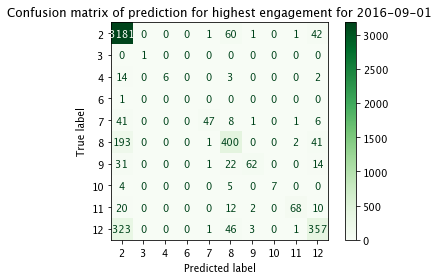

The prediction report for highest engagement for 2016-10-01
              precision    recall  f1-score   support

           2   0.846049  0.960247  0.899538      3245
           3   1.000000  1.000000  1.000000         1
           4   0.875000  0.280000  0.424242        25
           6   1.000000  1.000000  1.000000         1
           7   0.865385  0.428571  0.573248       105
           8   0.700658  0.653374  0.676190       652
           9   0.873684  0.553333  0.677551       150
          10   1.000000  0.400000  0.571429        20
          11   1.000000  0.500000  0.666667       104
          12   0.691589  0.500000  0.580392       740

    accuracy                       0.814793      5043
   macro avg   0.885236  0.627553  0.706926      5043
weighted avg   0.809801  0.814793  0.802015      5043

The overall prediction accuracy of the highest engagement for 2016-10-01 is 0.8147927820741622. 



<Figure size 432x288 with 0 Axes>

The prediction report for highest engagement for 2016-11-01
              precision    recall  f1-score   support

           2   0.831972  0.953496  0.888598      3204
           3   0.000000  0.000000  0.000000         2
           4   1.000000  0.181818  0.307692        33
           6   1.000000  0.625000  0.769231         8
           7   0.840000  0.333333  0.477273       126
           8   0.727434  0.622727  0.671020       660
           9   0.879518  0.548872  0.675926       133
          10   0.916667  0.478261  0.628571        23
          11   0.888889  0.542373  0.673684       118
          12   0.679931  0.533967  0.598174       736

    accuracy                       0.805076      5043
   macro avg   0.776441  0.481985  0.569017      5043
weighted avg   0.800309  0.805076  0.791293      5043

The overall prediction accuracy of the highest engagement for 2016-11-01 is 0.8050763434463613. 



<Figure size 432x288 with 0 Axes>

The prediction report for highest engagement for 2016-12-01
              precision    recall  f1-score   support

           2   0.844782  0.958929  0.898244      3360
           3   1.000000  0.750000  0.857143         8
           4   0.916667  0.354839  0.511628        31
           7   0.890625  0.401408  0.553398       142
           8   0.660870  0.573585  0.614141       530
           9   0.853659  0.353535  0.500000        99
          10   1.000000  0.333333  0.500000        12
          11   0.968750  0.620000  0.756098       100
          12   0.709343  0.538765  0.612397       761

    accuracy                       0.815189      5043
   macro avg   0.871633  0.542710  0.644783      5043
weighted avg   0.809996  0.815189  0.801515      5043

The overall prediction accuracy of the highest engagement for 2016-12-01 is 0.8151893714059092. 



<Figure size 432x288 with 0 Axes>

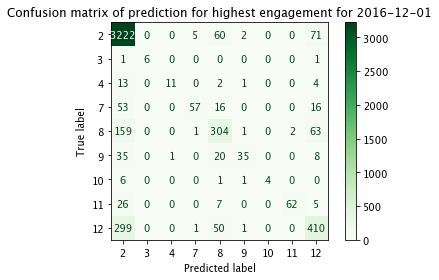

In [3]:
for i in range(len(predictor_month)):
    
    pred_month = predictor_month[i]
    out_month = outcome_month[i]
    outcome_df_cut = outcome_df[['Patient ID', pred_month]]
    train_x = pd.merge(merged_predictor_df, outcome_df_cut, on = "Patient ID", how = "inner")
    train_x = train_x.drop(columns = ['Patient ID'])
    train_y = outcome_df[['Patient ID', out_month]]
    train_y = pd.merge(merged_predictor_df, train_y, on = "Patient ID", how = "inner")
    train_y = train_y[[out_month]]
    
    X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.33, random_state=42)
    clf = RandomForestClassifier(n_estimators = 10, 
                                 random_state = 0)
    clf.fit(X_train, np.array(y_train).reshape(1,-1)[0])
    pred_test_rf = clf.predict(X_test)
    
    sk_report = classification_report(digits = 6, 
                                      y_true = y_test, 
                                      y_pred = pred_test_rf,
                                      zero_division = 0)
    print('The prediction report for highest engagement for {}'.format(out_month))
    print(sk_report)
    test_acc = sum(np.multiply(pred_test_rf == np.array(y_test).reshape(1,-1)[0], 1)) / y_test.shape[0]
    print('The overall prediction accuracy of the highest engagement for {} is {}. \n'.format(out_month, test_acc))
    
    cm = confusion_matrix(np.array(y_test).reshape(1,-1)[0], pred_test_rf)
    plt.figure()
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = np.sort(y_test[out_month].unique()))
    disp.plot(cmap = plt.cm.Greens)
    plt.title('Confusion matrix of prediction for highest engagement for {}'.format(out_month))
    plt.show()

In [4]:
sample_feature_importance = {'Predictor Variable': train_x.columns, 'Feature Importance': clf.feature_importances_}
pd.DataFrame(data=sample_feature_importance).sort_values(by='Feature Importance', ascending = False)

Predictor Variable  Feature Importance
42                      2016-11-01            0.230725
23                            Peso            0.071455
28                       YearBirth            0.068226
24                           Talla            0.061115
21                              FC            0.056087
20                     Temperatura            0.051017
22                              FR            0.045526
27                     HASistolica            0.040338
40              ReqEnergeticoBasal            0.036878
26                    HADiastolica            0.034053
41                             BMI            0.030101
39                        Calories            0.022119
1                            AHFHA            0.015310
31             ApoyoInstrumental_x            0.014911
3                            AHFCA            0.014648
25                     Suplementos            0.014474
13                           APPHA            0.014038
10                 APPDislipidemia            0.013840
18                  APPQuirurgicos            0.013484
0                            AHFDM            0.013407
4                  AHFDislipidemia            0.013334
38             ApoyoInstrumental_y            0.012872
19                    APPAlergicos            0.011315
37          ApoyoSocialEmocional_y            0.010780
8                    APPNeuropatia            0.008691
11                           APPVP            0.007845
9                      APPCatarata            0.007722
2                            AHFMP            0.007677
17                     APPObesidad            0.007664
32                      Neuropathy            0.007545
29  TrastornosConductaAlimetaria_x            0.007368
6                            APPDM            0.005147
5                         AHFOtros            0.004989
7                            APPVC            0.004709
15                     APPGlaucoma            0.004037
35                      AUTONOMICA            0.003655
12                           APPER            0.003448
34                        VISCERAL            0.002860
14                  APPRetinopatia            0.002701
16                    APPVCerebral            0.002127
33                      PERIFERICA            0.001763
36  TrastornosConductaAlimetaria_y            0.000000
30          ApoyoSocialEmocional_x            0.000000

### Logistic Regression with $L_1$ norm

The prediction report for highest engagement for 2013-07-01
              precision    recall  f1-score   support

           2   0.958775  0.995222  0.976659      4814
           8   0.500000  0.105505  0.174242       218
          10   0.000000  0.000000  0.000000        11

    accuracy                       0.954591      5043
   macro avg   0.486258  0.366909  0.383634      5043
weighted avg   0.936852  0.954591  0.939841      5043

The overall prediction accuracy of the highest engagement for 2013-07-01 is 0.9545905215149713. 



<Figure size 432x288 with 0 Axes>

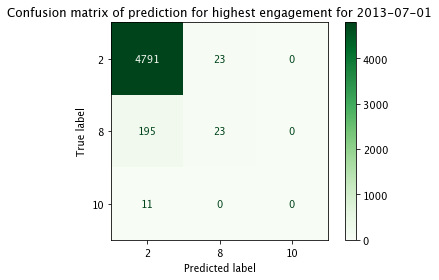

The prediction report for highest engagement for 2013-08-01
              precision    recall  f1-score   support

           2   0.975719  0.987812  0.981729      4841
           8   0.542254  0.409574  0.466667       188
          10   0.000000  0.000000  0.000000        14

    accuracy                       0.963514      5043
   macro avg   0.505991  0.465796  0.482798      5043
weighted avg   0.956851  0.963514  0.959802      5043

The overall prediction accuracy of the highest engagement for 2013-08-01 is 0.9635137814792782. 



<Figure size 432x288 with 0 Axes>

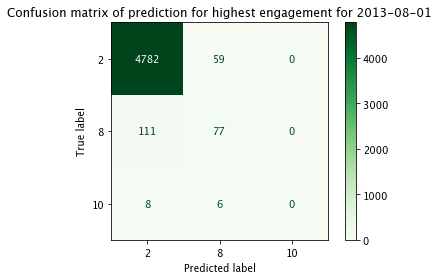

The prediction report for highest engagement for 2013-09-01
              precision    recall  f1-score   support

           2   0.975041  0.986341  0.980658      4832
           8   0.561290  0.435000  0.490141       200
          10   0.000000  0.000000  0.000000        11

    accuracy                       0.962324      5043
   macro avg   0.512110  0.473780  0.490266      5043
weighted avg   0.956505  0.962324  0.959066      5043

The overall prediction accuracy of the highest engagement for 2013-09-01 is 0.9623240134840373. 



<Figure size 432x288 with 0 Axes>

The prediction report for highest engagement for 2013-10-01
              precision    recall  f1-score   support

           2   0.973325  0.991496  0.982326      4821
           8   0.689394  0.425234  0.526012       214
          10   0.000000  0.000000  0.000000         8

    accuracy                       0.965893      5043
   macro avg   0.554240  0.472243  0.502779      5043
weighted avg   0.959733  0.965893  0.961404      5043

The overall prediction accuracy of the highest engagement for 2013-10-01 is 0.96589331746976. 



<Figure size 432x288 with 0 Axes>

The prediction report for highest engagement for 2013-11-01
              precision    recall  f1-score   support

           2   0.977490  0.996548  0.986927      4924
           8   0.217391  0.044643  0.074074       112
          10   0.000000  0.000000  0.000000         7

    accuracy                       0.974023      5043
   macro avg   0.398294  0.347063  0.353667      5043
weighted avg   0.959252  0.974023  0.965283      5043

The overall prediction accuracy of the highest engagement for 2013-11-01 is 0.9740233987705731. 



<Figure size 432x288 with 0 Axes>

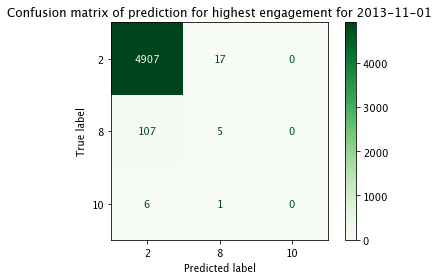

The prediction report for highest engagement for 2013-12-01
              precision    recall  f1-score   support

           2   0.964293  0.999589  0.981624      4863
           8   0.000000  0.000000  0.000000       168
          10   0.000000  0.000000  0.000000        12

    accuracy                       0.963910      5043
   macro avg   0.321431  0.333196  0.327208      5043
weighted avg   0.929874  0.963910  0.946586      5043

The overall prediction accuracy of the highest engagement for 2013-12-01 is 0.9639103708110252. 



<Figure size 432x288 with 0 Axes>

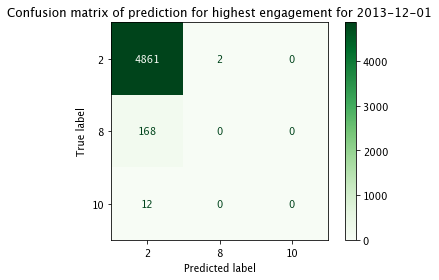

The prediction report for highest engagement for 2014-01-01
              precision    recall  f1-score   support

           2   0.957352  0.991377  0.974068      4755
           8   0.613445  0.264493  0.369620       276
          10   0.000000  0.000000  0.000000        12

    accuracy                       0.949237      5043
   macro avg   0.523599  0.418623  0.447896      5043
weighted avg   0.936252  0.949237  0.938669      5043

The overall prediction accuracy of the highest engagement for 2014-01-01 is 0.949236565536387. 



<Figure size 432x288 with 0 Axes>

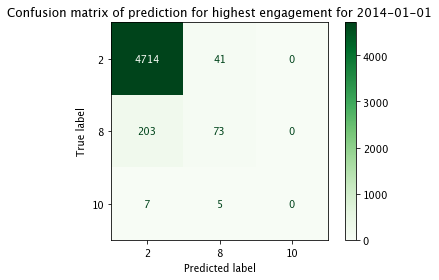

The prediction report for highest engagement for 2014-02-01
              precision    recall  f1-score   support

           2   0.965645  0.985513  0.975478      4763
           8   0.593407  0.420233  0.492027       257
          10   0.000000  0.000000  0.000000        23

    accuracy                       0.952211      5043
   macro avg   0.519684  0.468582  0.489168      5043
weighted avg   0.942271  0.952211  0.946392      5043

The overall prediction accuracy of the highest engagement for 2014-02-01 is 0.9522109855244894. 



<Figure size 432x288 with 0 Axes>

The prediction report for highest engagement for 2014-03-01
              precision    recall  f1-score   support

           2   0.962611  0.986870  0.974590      4722
           8   0.673267  0.447368  0.537549       304
          10   0.000000  0.000000  0.000000        17

    accuracy                       0.951021      5043
   macro avg   0.545293  0.478079  0.504046      5043
weighted avg   0.941924  0.951021  0.944959      5043

The overall prediction accuracy of the highest engagement for 2014-03-01 is 0.9510212175292485. 



<Figure size 432x288 with 0 Axes>

The prediction report for highest engagement for 2014-04-01
              precision    recall  f1-score   support

           2   0.967668  0.982740  0.975146      4751
           8   0.568807  0.467925  0.513458       265
          10   0.000000  0.000000  0.000000        27

    accuracy                       0.950426      5043
   macro avg   0.512159  0.483555  0.496201      5043
weighted avg   0.941528  0.950426  0.945664      5043

The overall prediction accuracy of the highest engagement for 2014-04-01 is 0.950426333531628. 



<Figure size 432x288 with 0 Axes>

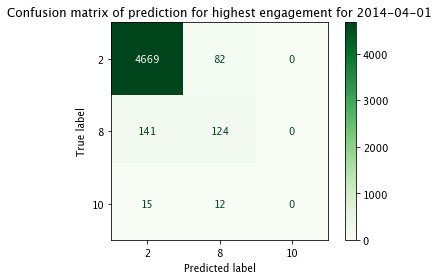

The prediction report for highest engagement for 2014-05-01
              precision    recall  f1-score   support

           2   0.957858  0.984215  0.970857      4688
           8   0.654867  0.448485  0.532374       330
          10   0.000000  0.000000  0.000000        25

    accuracy                       0.944279      5043
   macro avg   0.537575  0.477567  0.501077      5043
weighted avg   0.933282  0.944279  0.937351      5043

The overall prediction accuracy of the highest engagement for 2014-05-01 is 0.9442791988895499. 



<Figure size 432x288 with 0 Axes>

The prediction report for highest engagement for 2014-06-01
              precision    recall  f1-score   support

           2   0.961991  0.983892  0.972818      4656
           8   0.708185  0.543716  0.615147       366
          10   0.000000  0.000000  0.000000        21

    accuracy                       0.947849      5043
   macro avg   0.556725  0.509203  0.529322      5043
weighted avg   0.939565  0.947849  0.942809      5043

The overall prediction accuracy of the highest engagement for 2014-06-01 is 0.9478485028752727. 



<Figure size 432x288 with 0 Axes>

The prediction report for highest engagement for 2014-07-01
              precision    recall  f1-score   support

           2   0.953936  0.982532  0.968023      4637
           8   0.651685  0.483333  0.555024       360
          10   0.000000  0.000000  0.000000        36
          12   0.000000  0.000000  0.000000        10

    accuracy                       0.937934      5043
   macro avg   0.401405  0.366466  0.380762      5043
weighted avg   0.923658  0.937934  0.929711      5043

The overall prediction accuracy of the highest engagement for 2014-07-01 is 0.9379337695815982. 



<Figure size 432x288 with 0 Axes>

The prediction report for highest engagement for 2014-08-01
              precision    recall  f1-score   support

           2   0.956494  0.982430  0.969288      4610
           7   0.000000  0.000000  0.000000         4
           8   0.681967  0.551724  0.609971       377
           9   0.000000  0.000000  0.000000         1
          10   0.333333  0.041667  0.074074        24
          11   0.000000  0.000000  0.000000         2
          12   0.000000  0.000000  0.000000        25

    accuracy                       0.939520      5043
   macro avg   0.281685  0.225117  0.236190      5043
weighted avg   0.926936  0.939520  0.932016      5043

The overall prediction accuracy of the highest engagement for 2014-08-01 is 0.9395201269085861. 



<Figure size 432x288 with 0 Axes>

The prediction report for highest engagement for 2014-09-01
              precision    recall  f1-score   support

           2   0.949426  0.980470  0.964698      4557
           7   0.000000  0.000000  0.000000         2
           8   0.635015  0.509524  0.565390       420
           9   0.000000  0.000000  0.000000         1
          10   0.000000  0.000000  0.000000        17
          12   0.000000  0.000000  0.000000        46

    accuracy                       0.928416      5043
   macro avg   0.264074  0.248332  0.255015      5043
weighted avg   0.910815  0.928416  0.918817      5043

The overall prediction accuracy of the highest engagement for 2014-09-01 is 0.9284156256196708. 



<Figure size 432x288 with 0 Axes>

The prediction report for highest engagement for 2014-10-01
              precision    recall  f1-score   support

           2   0.946136  0.974348  0.960035      4561
           7   0.000000  0.000000  0.000000         4
           8   0.537572  0.493369  0.514523       377
           9   0.000000  0.000000  0.000000         5
          10   0.000000  0.000000  0.000000        24
          11   0.000000  0.000000  0.000000         9
          12   0.000000  0.000000  0.000000        63

    accuracy                       0.918104      5043
   macro avg   0.211958  0.209674  0.210651      5043
weighted avg   0.895893  0.918104  0.906741      5043

The overall prediction accuracy of the highest engagement for 2014-10-01 is 0.9181043029942495. 



<Figure size 432x288 with 0 Axes>

The prediction report for highest engagement for 2014-11-01
              precision    recall  f1-score   support

           2   0.942100  0.978845  0.960121      4538
           7   0.000000  0.000000  0.000000         1
           8   0.500000  0.445652  0.471264       368
           9   0.000000  0.000000  0.000000         4
          10   0.000000  0.000000  0.000000        31
          11   0.000000  0.000000  0.000000         5
          12   0.000000  0.000000  0.000000        96

    accuracy                       0.913345      5043
   macro avg   0.206014  0.203500  0.204484      5043
weighted avg   0.884245  0.913345  0.898365      5043

The overall prediction accuracy of the highest engagement for 2014-11-01 is 0.9133452310132858. 



<Figure size 432x288 with 0 Axes>

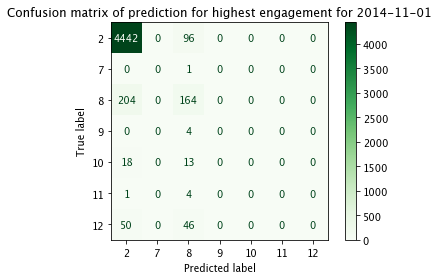

The prediction report for highest engagement for 2014-12-01
              precision    recall  f1-score   support

           2   0.903602  0.989023  0.944385      4464
           7   0.000000  0.000000  0.000000        22
           8   0.217054  0.109804  0.145833       255
           9   0.333333  0.027778  0.051282        36
          10   0.000000  0.000000  0.000000        25
          11   0.000000  0.000000  0.000000        22
          12   0.800000  0.091324  0.163934       219

    accuracy                       0.885187      5043
   macro avg   0.321999  0.173990  0.186491      5043
weighted avg   0.847953  0.885187  0.850817      5043

The overall prediction accuracy of the highest engagement for 2014-12-01 is 0.8851873884592505. 



<Figure size 432x288 with 0 Axes>

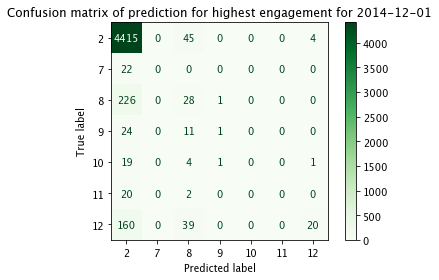

The prediction report for highest engagement for 2015-01-01
              precision    recall  f1-score   support

           2   0.901435  0.985899  0.941777      4397
           7   0.000000  0.000000  0.000000        22
           8   0.233333  0.038462  0.066038       182
           9   0.000000  0.000000  0.000000        56
          10   0.000000  0.000000  0.000000        11
          11   0.000000  0.000000  0.000000        77
          12   0.455882  0.312081  0.370518       298

    accuracy                       0.879437      5043
   macro avg   0.227236  0.190920  0.196905      5043
weighted avg   0.821322  0.879437  0.845415      5043

The overall prediction accuracy of the highest engagement for 2015-01-01 is 0.8794368431489193. 



<Figure size 432x288 with 0 Axes>

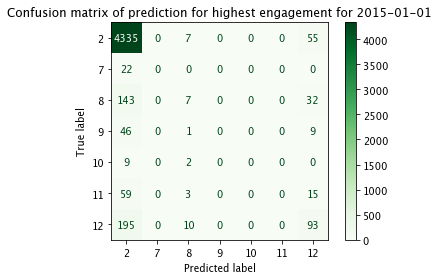

The prediction report for highest engagement for 2015-02-01
              precision    recall  f1-score   support

           2   0.899115  0.979353  0.937521      4359
           7   0.000000  0.000000  0.000000        25
           8   0.182390  0.131818  0.153034       220
           9   0.666667  0.088235  0.155844        68
          10   0.000000  0.000000  0.000000        25
          11   0.000000  0.000000  0.000000        48
          12   0.338583  0.144295  0.202353       298

    accuracy                       0.861987      5043
   macro avg   0.298108  0.191957  0.206965      5043
weighted avg   0.814119  0.861987  0.831096      5043

The overall prediction accuracy of the highest engagement for 2015-02-01 is 0.8619869125520524. 



<Figure size 432x288 with 0 Axes>

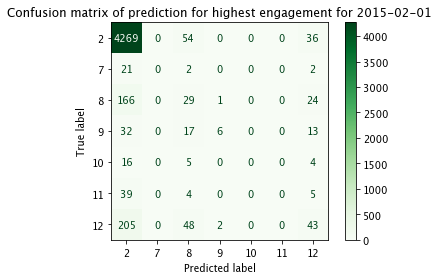

The prediction report for highest engagement for 2015-03-01
              precision    recall  f1-score   support

           2   0.909490  0.980346  0.943590      4223
           7   0.000000  0.000000  0.000000        30
           8   0.324074  0.133588  0.189189       262
           9   0.000000  0.000000  0.000000        75
          10   0.000000  0.000000  0.000000        25
          11   0.000000  0.000000  0.000000        50
          12   0.332461  0.335979  0.334211       378

    accuracy                       0.853064      5043
   macro avg   0.223718  0.207130  0.209570      5043
weighted avg   0.803362  0.853064  0.825040      5043

The overall prediction accuracy of the highest engagement for 2015-03-01 is 0.8530636525877454. 



<Figure size 432x288 with 0 Axes>

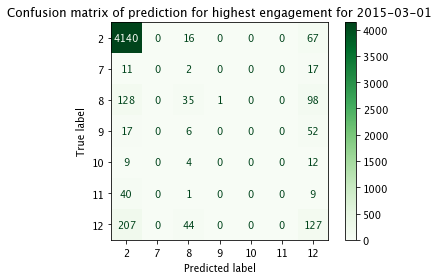

The prediction report for highest engagement for 2015-04-01
              precision    recall  f1-score   support

           2   0.892695  0.973753  0.931463      4229
           7   0.000000  0.000000  0.000000        36
           8   0.231481  0.083333  0.122549       300
           9   0.000000  0.000000  0.000000        51
          10   0.000000  0.000000  0.000000        30
          11   0.000000  0.000000  0.000000        49
          12   0.425466  0.393678  0.408955       348

    accuracy                       0.848701      5043
   macro avg   0.221377  0.207252  0.208995      5043
weighted avg   0.791733  0.848701  0.816625      5043

The overall prediction accuracy of the highest engagement for 2015-04-01 is 0.8487011699385286. 



<Figure size 432x288 with 0 Axes>

The prediction report for highest engagement for 2015-05-01
              precision    recall  f1-score   support

           2   0.884590  0.977536  0.928744      4140
           7   0.000000  0.000000  0.000000        25
           8   0.285714  0.014184  0.027027       282
           9   0.000000  0.000000  0.000000        65
          10   0.000000  0.000000  0.000000        37
          11   0.000000  0.000000  0.000000        49
          12   0.462555  0.471910  0.467186       445

    accuracy                       0.844934      5043
   macro avg   0.233266  0.209090  0.203279      5043
weighted avg   0.782989  0.844934  0.805179      5043

The overall prediction accuracy of the highest engagement for 2015-05-01 is 0.8449335712869324. 



<Figure size 432x288 with 0 Axes>

The prediction report for highest engagement for 2015-06-01
              precision    recall  f1-score   support

           2   0.878734  0.972807  0.923381      4082
           7   0.000000  0.000000  0.000000        25
           8   0.290323  0.030405  0.055046       296
           9   0.000000  0.000000  0.000000        76
          10   0.000000  0.000000  0.000000        27
          11   0.000000  0.000000  0.000000        80
          12   0.472617  0.509847  0.490526       457

    accuracy                       0.835415      5043
   macro avg   0.234525  0.216151  0.209850      5043
weighted avg   0.771151  0.835415  0.795103      5043

The overall prediction accuracy of the highest engagement for 2015-06-01 is 0.835415427325005. 



<Figure size 432x288 with 0 Axes>

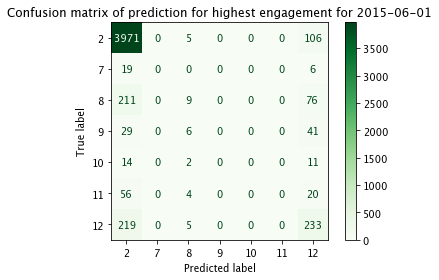

The prediction report for highest engagement for 2015-07-01
              precision    recall  f1-score   support

           2   0.880400  0.973843  0.924767      3976
           7   0.000000  0.000000  0.000000        30
           8   0.421053  0.022472  0.042667       356
           9   0.000000  0.000000  0.000000        52
          10   0.000000  0.000000  0.000000        39
          11   0.000000  0.000000  0.000000        49
          12   0.519169  0.600739  0.556984       541

    accuracy                       0.833829      5043
   macro avg   0.260089  0.228151  0.217774      5043
weighted avg   0.779543  0.833829  0.791868      5043

The overall prediction accuracy of the highest engagement for 2015-07-01 is 0.8338290699980171. 



<Figure size 432x288 with 0 Axes>

The prediction report for highest engagement for 2015-08-01
              precision    recall  f1-score   support

           2   0.871969  0.972208  0.919364      3958
           7   0.000000  0.000000  0.000000        37
           8   0.270833  0.033943  0.060325       383
           9   0.000000  0.000000  0.000000        80
          10   0.000000  0.000000  0.000000        36
          11   0.000000  0.000000  0.000000        73
          12   0.500000  0.611345  0.550095       476

    accuracy                       0.823319      5043
   macro avg   0.234686  0.231071  0.218541      5043
weighted avg   0.752128  0.823319  0.778067      5043

The overall prediction accuracy of the highest engagement for 2015-08-01 is 0.8233194527067222. 



<Figure size 432x288 with 0 Axes>

The prediction report for highest engagement for 2015-09-01
              precision    recall  f1-score   support

           2   0.867530  0.968544  0.915258      3942
           4   0.000000  0.000000  0.000000         7
           7   0.000000  0.000000  0.000000        35
           8   0.279412  0.051491  0.086957       369
           9   0.000000  0.000000  0.000000        61
          10   0.000000  0.000000  0.000000        38
          11   0.000000  0.000000  0.000000        58
          12   0.501742  0.540338  0.520325       533

    accuracy                       0.817965      5043
   macro avg   0.206086  0.195047  0.190318      5043
weighted avg   0.751603  0.817965  0.776793      5043

The overall prediction accuracy of the highest engagement for 2015-09-01 is 0.817965496728138. 



<Figure size 432x288 with 0 Axes>

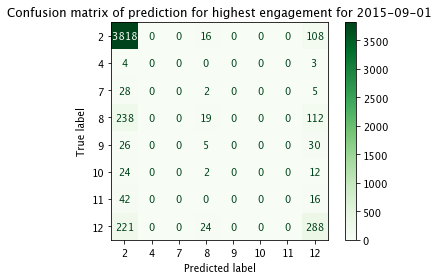

The prediction report for highest engagement for 2015-10-01
              precision    recall  f1-score   support

           2   0.839728  0.965292  0.898143      3832
           4   0.000000  0.000000  0.000000        19
           7   0.000000  0.000000  0.000000        54
           8   0.200000  0.020356  0.036952       393
           9   0.000000  0.000000  0.000000        59
          10   0.000000  0.000000  0.000000        43
          11   0.000000  0.000000  0.000000        68
          12   0.478261  0.497391  0.487639       575

    accuracy                       0.791791      5043
   macro avg   0.189749  0.185380  0.177842      5043
weighted avg   0.708197  0.791791  0.740947      5043

The overall prediction accuracy of the highest engagement for 2015-10-01 is 0.7917906008328376. 



<Figure size 432x288 with 0 Axes>

The prediction report for highest engagement for 2015-11-01
              precision    recall  f1-score   support

           2   0.841561  0.962447  0.897954      3808
           4   0.000000  0.000000  0.000000        21
           7   0.000000  0.000000  0.000000        40
           8   0.328358  0.057441  0.097778       383
           9   0.000000  0.000000  0.000000        63
          10   0.000000  0.000000  0.000000        18
          11   0.000000  0.000000  0.000000        58
          12   0.508857  0.484663  0.496465       652

    accuracy                       0.793774      5043
   macro avg   0.209847  0.188069  0.186525      5043
weighted avg   0.726195  0.793774  0.749664      5043

The overall prediction accuracy of the highest engagement for 2015-11-01 is 0.7937735474915725. 



<Figure size 432x288 with 0 Axes>

The prediction report for highest engagement for 2015-12-01
              precision    recall  f1-score   support

           2   0.846529  0.959726  0.899581      3799
           4   0.000000  0.000000  0.000000        21
           7   0.000000  0.000000  0.000000        54
           8   0.500000  0.034091  0.063830       352
           9   0.000000  0.000000  0.000000        72
          10   0.000000  0.000000  0.000000        19
          11   0.000000  0.000000  0.000000        82
          12   0.500000  0.552795  0.525074       644

    accuracy                       0.795955      5043
   macro avg   0.230816  0.193327  0.186061      5043
weighted avg   0.736459  0.795955  0.749181      5043

The overall prediction accuracy of the highest engagement for 2015-12-01 is 0.7959547888161809. 



<Figure size 432x288 with 0 Axes>

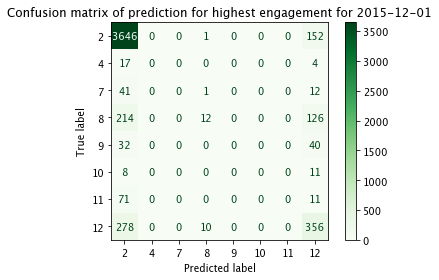

The prediction report for highest engagement for 2016-01-01
              precision    recall  f1-score   support

           2   0.829713  0.957154  0.888889      3711
           4   0.000000  0.000000  0.000000        20
           6   0.000000  0.000000  0.000000         1
           7   0.000000  0.000000  0.000000        55
           8   0.270833  0.027837  0.050485       467
           9   0.000000  0.000000  0.000000        94
          10   0.000000  0.000000  0.000000        19
          11   0.000000  0.000000  0.000000        74
          12   0.420168  0.498339  0.455927       602

    accuracy                       0.766409      5043
   macro avg   0.168968  0.164815  0.155033      5043
weighted avg   0.685799  0.766409  0.713209      5043

The overall prediction accuracy of the highest engagement for 2016-01-01 is 0.7664088836010311. 



<Figure size 432x288 with 0 Axes>

The prediction report for highest engagement for 2016-02-01
              precision    recall  f1-score   support

           2   0.814996  0.972408  0.886771      3588
           3   0.000000  0.000000  0.000000         1
           4   0.000000  0.000000  0.000000        11
           7   0.000000  0.000000  0.000000        75
           8   0.293103  0.072034  0.115646       472
           9   0.000000  0.000000  0.000000        97
          10   0.000000  0.000000  0.000000        11
          11   0.000000  0.000000  0.000000        84
          12   0.428793  0.393466  0.410370       704

    accuracy                       0.753520      5043
   macro avg   0.170766  0.159768  0.156976      5043
weighted avg   0.667147  0.753520  0.699032      5043

The overall prediction accuracy of the highest engagement for 2016-02-01 is 0.7535197303192545. 



<Figure size 432x288 with 0 Axes>

The prediction report for highest engagement for 2016-03-01
              precision    recall  f1-score   support

           2   0.813195  0.958206  0.879765      3589
           3   0.000000  0.000000  0.000000         2
           4   0.000000  0.000000  0.000000        41
           6   0.000000  0.000000  0.000000         2
           7   0.000000  0.000000  0.000000        71
           8   0.142857  0.010917  0.020284       458
           9   0.000000  0.000000  0.000000       104
          10   0.000000  0.000000  0.000000        16
          11   0.000000  0.000000  0.000000        70
          12   0.487805  0.550725  0.517359       690

    accuracy                       0.758279      5043
   macro avg   0.144386  0.151985  0.141741      5043
weighted avg   0.658451  0.758279  0.698739      5043

The overall prediction accuracy of the highest engagement for 2016-03-01 is 0.7582788023002182. 



<Figure size 432x288 with 0 Axes>

The prediction report for highest engagement for 2016-04-01
              precision    recall  f1-score   support

           2   0.781780  0.955959  0.860140      3474
           4   0.000000  0.000000  0.000000        17
           6   0.000000  0.000000  0.000000         2
           7   0.000000  0.000000  0.000000        72
           8   0.440000  0.038596  0.070968       570
           9   0.000000  0.000000  0.000000       100
          10   0.000000  0.000000  0.000000        20
          11   0.000000  0.000000  0.000000        81
          12   0.445638  0.469590  0.457300       707

    accuracy                       0.728733      5043
   macro avg   0.185269  0.162683  0.154268      5043
weighted avg   0.650757  0.728733  0.664662      5043

The overall prediction accuracy of the highest engagement for 2016-04-01 is 0.7287328970850684. 



<Figure size 432x288 with 0 Axes>

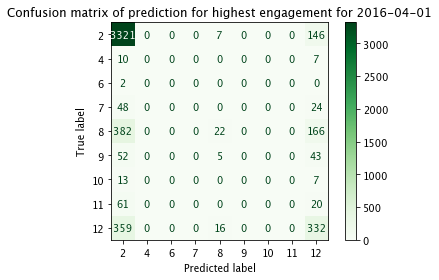

The prediction report for highest engagement for 2016-05-01
              precision    recall  f1-score   support

           2   0.775402  0.960143  0.857940      3362
           3   0.000000  0.000000  0.000000         2
           4   0.000000  0.000000  0.000000        19
           6   0.000000  0.000000  0.000000         4
           7   0.000000  0.000000  0.000000        76
           8   0.255319  0.057416  0.093750       627
           9   0.000000  0.000000  0.000000        64
          10   0.000000  0.000000  0.000000        27
          11   0.000000  0.000000  0.000000        95
          12   0.474185  0.455020  0.464405       767

    accuracy                       0.716439      5043
   macro avg   0.150491  0.147258  0.141609      5043
weighted avg   0.620799  0.716439  0.654248      5043

The overall prediction accuracy of the highest engagement for 2016-05-01 is 0.7164386278009122. 



<Figure size 432x288 with 0 Axes>

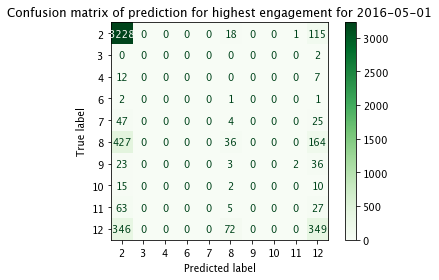

The prediction report for highest engagement for 2016-06-01
              precision    recall  f1-score   support

           2   0.760529  0.943565  0.842217      3349
           3   0.000000  0.000000  0.000000         1
           4   0.000000  0.000000  0.000000        16
           6   0.000000  0.000000  0.000000         1
           7   0.000000  0.000000  0.000000        73
           8   0.279778  0.146589  0.192381       689
           9   0.000000  0.000000  0.000000        97
          10   0.000000  0.000000  0.000000        19
          11   0.000000  0.000000  0.000000        85
          12   0.442125  0.326788  0.375806       713

    accuracy                       0.692842      5043
   macro avg   0.148243  0.141694  0.141040      5043
weighted avg   0.605793  0.692842  0.638724      5043

The overall prediction accuracy of the highest engagement for 2016-06-01 is 0.692841562561967. 



<Figure size 432x288 with 0 Axes>

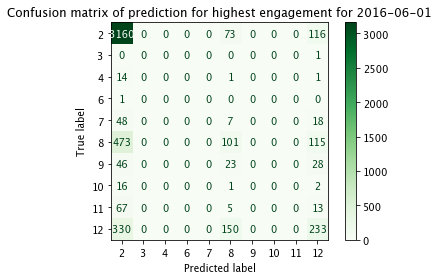

The prediction report for highest engagement for 2016-07-01
              precision    recall  f1-score   support

           2   0.757771  0.952796  0.844166      3326
           4   0.000000  0.000000  0.000000        17
           6   0.000000  0.000000  0.000000         4
           7   0.000000  0.000000  0.000000        93
           8   0.186992  0.038591  0.063978       596
           9   0.000000  0.000000  0.000000       128
          10   0.000000  0.000000  0.000000        21
          11   0.000000  0.000000  0.000000        94
          12   0.476965  0.460733  0.468708       764

    accuracy                       0.702756      5043
   macro avg   0.157970  0.161347  0.152984      5043
weighted avg   0.594130  0.702756  0.635320      5043

The overall prediction accuracy of the highest engagement for 2016-07-01 is 0.7027562958556415. 



<Figure size 432x288 with 0 Axes>

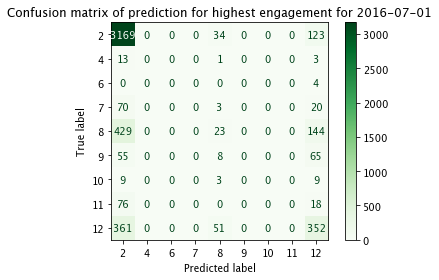

The prediction report for highest engagement for 2016-08-01
              precision    recall  f1-score   support

           2   0.749331  0.942455  0.834870      3267
           4   0.000000  0.000000  0.000000        37
           6   0.000000  0.000000  0.000000         2
           7   1.000000  0.009174  0.018182       109
           8   0.198473  0.039695  0.066158       655
           9   0.000000  0.000000  0.000000       119
          10   0.000000  0.000000  0.000000        19
          11   0.000000  0.000000  0.000000       109
          12   0.462594  0.511019  0.485602       726

    accuracy                       0.689471      5043
   macro avg   0.267822  0.166927  0.156090      5043
weighted avg   0.599426  0.689471  0.619747      5043

The overall prediction accuracy of the highest engagement for 2016-08-01 is 0.6894705532421178. 



<Figure size 432x288 with 0 Axes>

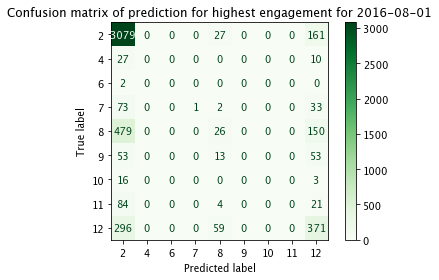

The prediction report for highest engagement for 2016-09-01
              precision    recall  f1-score   support

           2   0.739130  0.941570  0.828158      3286
           3   0.000000  0.000000  0.000000         1
           4   0.000000  0.000000  0.000000        25
           6   0.000000  0.000000  0.000000         1
           7   0.000000  0.000000  0.000000       104
           8   0.196172  0.064364  0.096927       637
           9   0.000000  0.000000  0.000000       130
          10   0.000000  0.000000  0.000000        16
          11   0.000000  0.000000  0.000000       112
          12   0.441358  0.391245  0.414793       731

    accuracy                       0.678366      5043
   macro avg   0.137666  0.139718  0.133988      5043
weighted avg   0.570370  0.678366  0.611994      5043

The overall prediction accuracy of the highest engagement for 2016-09-01 is 0.6783660519532024. 



<Figure size 432x288 with 0 Axes>

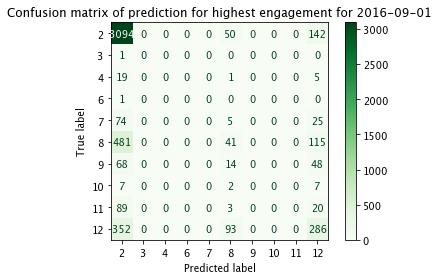

The prediction report for highest engagement for 2016-10-01
              precision    recall  f1-score   support

           2   0.749878  0.944222  0.835902      3245
           3   0.000000  0.000000  0.000000         1
           4   0.000000  0.000000  0.000000        25
           6   0.000000  0.000000  0.000000         1
           7   0.000000  0.000000  0.000000       105
           8   0.195980  0.059816  0.091657       652
           9   0.000000  0.000000  0.000000       150
          10   0.000000  0.000000  0.000000        20
          11   0.000000  0.000000  0.000000       104
          12   0.422164  0.432432  0.427236       740

    accuracy                       0.678763      5043
   macro avg   0.136802  0.143647  0.135480      5043
weighted avg   0.569806  0.678763  0.612417      5043

The overall prediction accuracy of the highest engagement for 2016-10-01 is 0.6787626412849495. 



<Figure size 432x288 with 0 Axes>

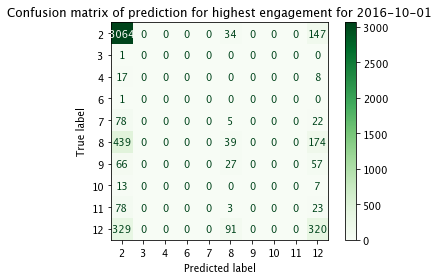

The prediction report for highest engagement for 2016-11-01
              precision    recall  f1-score   support

           2   0.728990  0.939451  0.820946      3204
           3   0.000000  0.000000  0.000000         2
           4   0.000000  0.000000  0.000000        33
           6   0.000000  0.000000  0.000000         8
           7   0.000000  0.000000  0.000000       126
           8   0.183908  0.024242  0.042838       660
           9   0.000000  0.000000  0.000000       133
          10   0.000000  0.000000  0.000000        23
          11   0.000000  0.000000  0.000000       118
          12   0.437727  0.491848  0.463212       736

    accuracy                       0.671822      5043
   macro avg   0.135062  0.145554  0.132700      5043
weighted avg   0.551107  0.671822  0.594787      5043

The overall prediction accuracy of the highest engagement for 2016-11-01 is 0.6718223279793774. 



<Figure size 432x288 with 0 Axes>

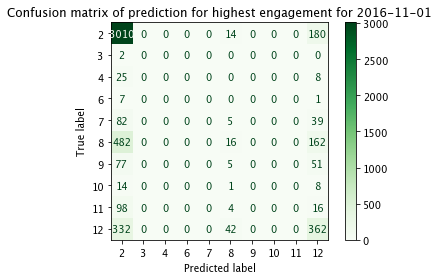

The prediction report for highest engagement for 2016-12-01
              precision    recall  f1-score   support

           2   0.758313  0.936607  0.838083      3360
           3   0.000000  0.000000  0.000000         8
           4   0.000000  0.000000  0.000000        31
           7   0.000000  0.000000  0.000000       142
           8   0.000000  0.000000  0.000000       530
           9   0.000000  0.000000  0.000000        99
          10   0.000000  0.000000  0.000000        12
          11   0.000000  0.000000  0.000000       100
          12   0.457723  0.533509  0.492718       761

    accuracy                       0.704541      5043
   macro avg   0.135115  0.163346  0.147867      5043
weighted avg   0.574313  0.704541  0.632742      5043

The overall prediction accuracy of the highest engagement for 2016-12-01 is 0.7045409478485029. 



<Figure size 432x288 with 0 Axes>

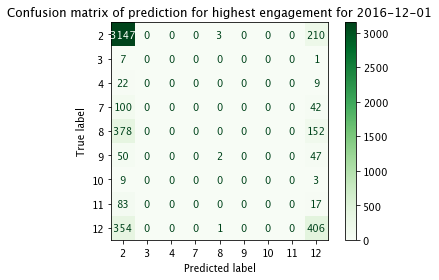

In [5]:
from sklearn.linear_model import LogisticRegression

for i in range(len(predictor_month)):
    
    pred_month = predictor_month[i]
    out_month = outcome_month[i]
    outcome_df_cut = outcome_df[['Patient ID', pred_month]]
    outcome_df_cut = outcome_df_cut.rename(columns={'patient': 'Patient ID'})
    train_x = pd.merge(merged_predictor_df, outcome_df_cut, on = "Patient ID", how = "inner")
    train_x = train_x.drop(columns = ['Patient ID'])
    train_y = outcome_df[['Patient ID', out_month]]
    train_y = pd.merge(merged_predictor_df, train_y, on = "Patient ID", how = "inner")
    train_y = train_y[[out_month]]
    
    X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.33, random_state=42)
    clf = LogisticRegression(penalty='l1', C = 0.01, solver='liblinear')
    clf.fit(X_train, np.array(y_train).reshape(1,-1)[0])
    pred_test_lr = clf.predict(X_test)
    
    sk_report = classification_report(digits = 6, 
                                      y_true = y_test, 
                                      y_pred = pred_test_lr,
                                      zero_division = 0)
    print('The prediction report for highest engagement for {}'.format(out_month))
    print(sk_report)
    test_acc = sum(np.multiply(pred_test_lr == np.array(y_test).reshape(1,-1)[0], 1)) / y_test.shape[0]
    print('The overall prediction accuracy of the highest engagement for {} is {}. \n'.format(out_month, test_acc))
    
    cm = confusion_matrix(np.array(y_test).reshape(1,-1)[0], pred_test_lr)
    plt.figure()
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = np.sort(y_test[out_month].unique()))
    disp.plot(cmap = plt.cm.Greens)
    plt.title('Confusion matrix of prediction for highest engagement for {}'.format(out_month))
    plt.show()

In [6]:
clf.coef_

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -1.32844961e-02,
         9.55659804e-04, -7.09676668e-04,  5.67005127e-03,
         0.00000000e+00,  0.00000000e+00,  3.26256924e-04,
        -1.82897057e-03,  1.67602886e-03,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -6.07359143e-04,  2.11463189e-04,  0.00000000e+00,
        -3.60798832e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00

We see that for the first a few months, the prediction is pretty accurate. This might due to the reason that we don't have the data for every month of a patient. And the date of the data is almost the early months.